# Lab 5 - Exploratory Data Analysis

## Directions

**Failure to follow the directions will result in a "0"**

The due dates for each are indicated in the Syllabus and the course calendar. If anything is unclear, please email EN605.448@gmail.com the official email for the course or ask questions in the Lab discussion area on Blackboard.

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

### General Instructions

1.  You will be submitting your assignment to Blackboard. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. It should say `In [1]` for the first codecell and increase by 1 throughout.

## Exploratory Data Analysis

In this Module, we partitioned the problem of EDA using a taxonomy with the following characteristics:

* **Data Type**: Numerical or Categorical.
* **Number of Variables**: 1 or many.
* **Technique**: descriptive statistics, tables or charts.

we will skip "goal" for now.

And we came up with a general set of tools for analyzing data, not all of them applicable to all the cases:

* Descriptive Statistics
* Frequency Table (absolute and relative)
* Histograms
* Boxplots Plot
* Bar chart
* Dot chart
* Heat map
* Scatter Plot

This does not exhaust all the chart types, though. We also have the following basic chart types that we talked about in the Visualization Module:

* Points
* Lines
* Lines and points

The goal for this lab is to get you acquainted with most of these tools by analyzing a real data set. Follow the general directions in this Module for *methodical* EDA including:

1. Single Variable Exploration.
2. Correlation or Problem driven Exploration of Pairwise Relationships.

Because we don't really have a problem or question here, we may have to be exhaustive. There are 21 comparisons possible, start with any 5 of them and then use what you discover to add 5 more.

And for each case, try different visualizations. What does a histogram tell you that a box-and-whiskers plot does not and vice versa? What about different bin sizes? And the most important bit: you must write something for every single chart you produce. The emphasis here is on *science*. At every juncture, you must say:

1. **Why am I trying this?** "I'm going to look at this data using a box and whiskers plot to explore its general shape." "I am trying more bins to see if the histogram reveals any interesting characteristics."
2. **Do it.**
3. **What did I learn?** "Although I know the data is generated from a normal distribution, it doesn't look normally distributed. The sample mean is X while the true mean is Y."

In EDA, you should generally never just *change* anything. You should copy your code, explain why you're making some change to the parameters, make the change and then note what happens.

Be inventive and creative.

In [1]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

sns.set(style="whitegrid")

# Answer

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## Insurance - Single Variable Exploration

### **AGE**
Age is an important aspect of insurance as younger ages usually mean a lower insurance. Youth usually equates to health and as one grows older, the body starts to break down causing more health issues. 

Age is a numerical with multiplicative real values. However here the values will start at 18 instead of 0.

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
data["age"].describe()

count   1338.00
mean      39.21
std       14.05
min       18.00
25%       27.00
50%       39.00
75%       51.00
max       64.00
Name: age, dtype: float64

The age range goes from 18 to 64 with a mean of 39.21. The mean is very close to the median at 39. The max is further away from the mean than the min (same for 75% than 25%) so the data is skewed slightly the lower end.

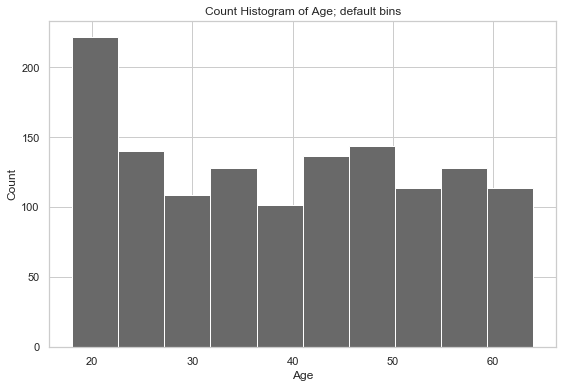

In [7]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( data[ "age"], color="DimGray")
axes.set_ylabel( "Count")
axes.set_xlabel( "Age")
axes.set_title("Count Histogram of Age; default bins")

plt.show()
plt.close()

As I asserted in the first description of the data, age is skewed lower. We see a large amount of people (over 200) in the first bin about twice as many as some bins and a third greater than the others. The rest of the bins all however between 100 and 150 people. 

It stands out that such a larger amount of 18-23 year olds than other bins. I am curious why this is the case. Are more younger people willing to get insured? Does this insurance agency have a program targeted to insure younger people as they are healthier and will be able to be better customers?

I would like to get the specific count of each age as well.

In [8]:
pd.DataFrame(data["age"].value_counts().sort_index())

,age
18,69
19,68
20,29
21,28
22,28
23,28
24,28
25,28
26,28
27,28


Now we can clearly see why the first bin is so large. 18 and 19 year olds are skewing the data set with over double the amount of any other age.

### **SEX**
Sex is a curious variable as men and women have a variety of different health concerns. A significant health factor for women is pregnancy which can have signficant healthcare costs. 

Sex is a categorical variable with either male or female. As the population is generally 50/50 I would assume that the data population is also.

In [9]:
pd.DataFrame(data["sex"].value_counts().sort_index())

,sex
female,662
male,676


The data shows practically a 50/50 split with only 14 more males out of a total of 1338 people.

I will plot the frequencies of sex to show the percentage and how close they are. 

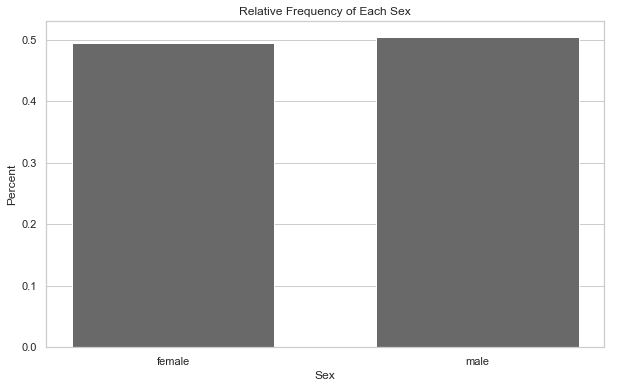

In [10]:
counts = data["sex"].value_counts().sort_index()
proportions = data["sex"].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Sex")
axes.set_xticks(x)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of Each Sex")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

Again, this shows how close to 50/50 the data is, just as initially expected. 

### **BMI**
BMI is an interesting variable. For how it is calculated based on height and weight, BMI is a multiplicative numeric variable. However, BMI is usually parsed into four buckets:

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

(https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm)

In general, normal weight would be best for health. Obesity would lend to higher insurance costs as it is associated with many health issues.

In [11]:
data["bmi"].describe()

count   1338.00
mean      30.66
std        6.10
min       15.96
25%       26.30
50%       30.40
75%       34.69
max       53.13
Name: bmi, dtype: float64

The minimum is 15.96 with a max of 53.13 and mean of 30.66. The median is about the same as well. This puts the data population on average as obese. The max is much farther above the median (and mean) than the minimum, but since the mean is almost equal to the median there are most likely more people with lower BMIs while there are a few people with extremely high values. We can see this with a box plot.

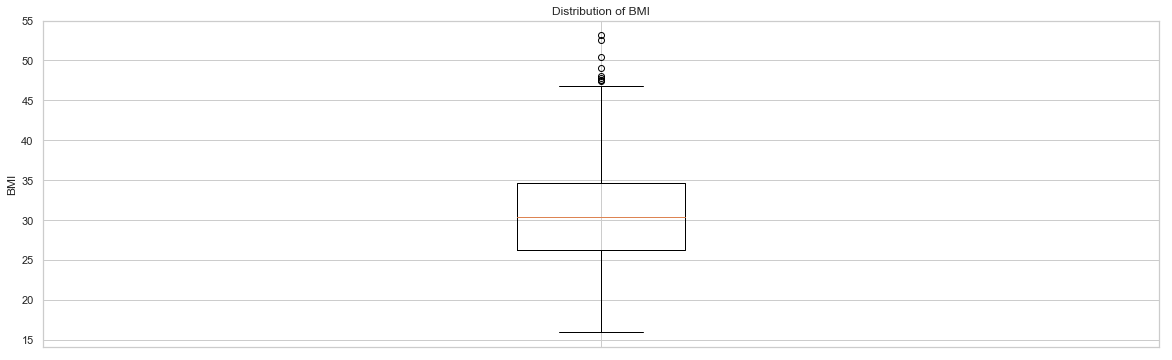

In [12]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(data[ "bmi"], labels=[''], showfliers=True, patch_artist=False, zorder=1)
axes.set_title("Distribution of BMI")
axes.set_ylabel("BMI")

plt.show()
plt.close()

The box plot shows no outliers on the low end but a handful on the high end. This makes sense as it is easier to be more obese than to be as skinny.

### **Children**
Children is a different variable. It is numerical so we can calculate the standard descriptive statistics but since there are not many values and they are all whole numbers, it can be viewed similar to a categorical variable as well. The more children one has, the more their insurance charges would increase as there are more people to care for.

In [13]:
data["children"].describe()

count   1338.00
mean       1.09
std        1.21
min        0.00
25%        0.00
50%        1.00
75%        2.00
max        5.00
Name: children, dtype: float64

The lowest value of zero makes sense which is also the 25th percentile. The median is 1 so there are good amount with small families. This makes sense as there are a lot more people 18 and 19 in this data who would usually not have any children. Let's look at this data as categorical as well do to only having 5 possible values.

In [14]:
pd.DataFrame(data["children"].value_counts().sort_index())

,children
0,574
1,324
2,240
3,157
4,25
5,18


The distribution shows many more people with 0 children than any other with 1 and 2 children together not even being greater. We can plot this with a bar graph to show the percentage distributions.

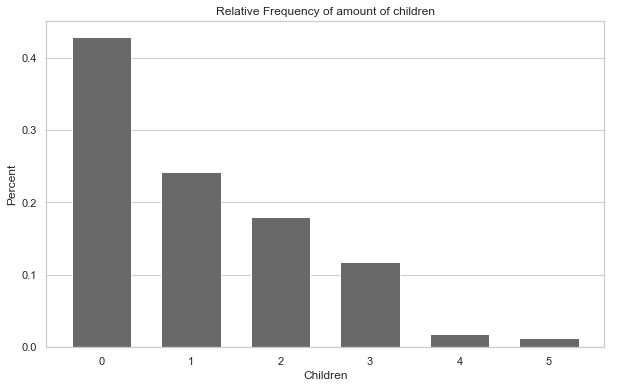

In [15]:
counts = data["children"].value_counts().sort_index()
proportions = data["children"].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Children")
axes.set_xticks(x)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of amount of children")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

With the above bar graph we can see that over 40% of all people have no children and almost 25% have 1 child. Very few have 4 or 5 children.

### **Smoker**
Smoker is a categorical binary variable with yes and no. I expect smoker to have higer charges than non-smoker as smoking can lead to more health issues.

In [16]:
pd.DataFrame(data["smoker"].value_counts().sort_index())

,smoker
no,1064
yes,274


Most people are non-smokers while only a few are smokers. I will plot the bar graph of the relative frequencies to give a more visual picture of this data.

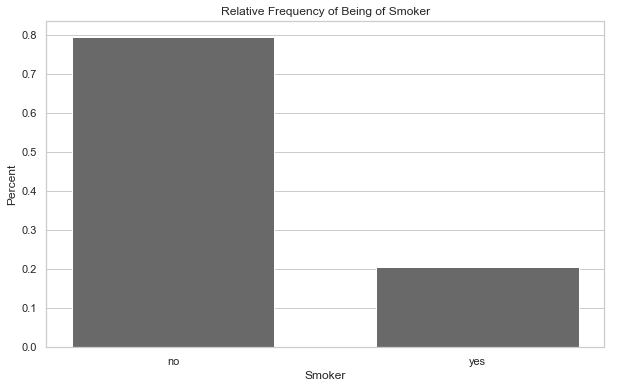

In [17]:
counts = data["smoker"].value_counts().sort_index()
proportions = data["smoker"].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Smoker")
axes.set_xticks(x)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of Being of Smoker")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

Non-smokers make up close to 80% of the people in the data set.

### **Region**
Region is a categorical variable describing where each person is from. I expect the amount of people in each region to be about the same unless the insurance agency is based out of a specific region which would have more people with them from that area.

In [18]:
pd.DataFrame(data["region"].value_counts().sort_index())

,region
northeast,324
northwest,325
southeast,364
southwest,325


The data does show that they are about even at least for NE, NW, and SW. SE has about 40 more people than the other regions but that is not a ton more. We can see the frequencies in the following bar chart.

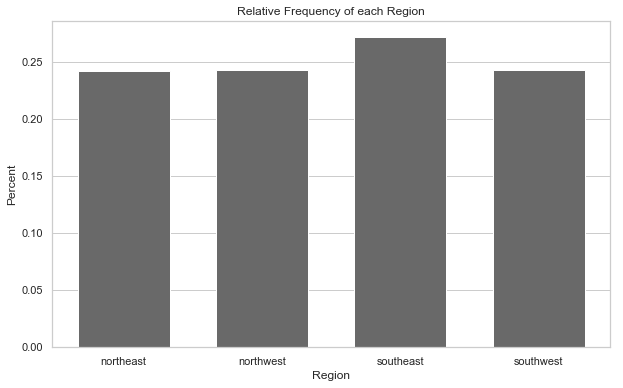

In [19]:
counts = data["region"].value_counts().sort_index()
proportions = data["region"].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Region")
axes.set_xticks(x)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of each Region")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

This chart shows how they all hover around 25% of the total data as expected. However, the SE region has the slight bump above the rest.

### **Charges**
Charges is the main variable are interested in with the other variables potentially ones that have an affect on this variable. I expect to see a lot of smaller charges from healthy people and then fewer and fewer charges in the more expensive range.

In [20]:
data["charges"].describe()

count    1338.00
mean    13270.42
std     12110.01
min      1121.87
25%      4740.29
50%      9382.03
75%     16639.91
max     63770.43
Name: charges, dtype: float64

The min is 1121.87 with a max at 63770.43. That is a large range for insurance charges with the median at 9382.03. The mean is much higher than the median at 13270.42. The data is skewed right so I should expect to see the distribution with much more data points on the left of the data set and a few very large points on the right. 

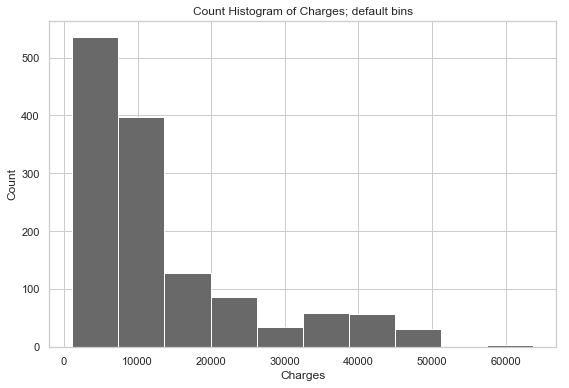

In [21]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( data[ "charges"], color="DimGray")
axes.set_ylabel( "Count")
axes.set_xlabel( "Charges")
axes.set_title("Count Histogram of Charges; default bins")

plt.show()
plt.close()

The above histogram shows the skew however I would like to specifically see the outliers of this data. Box plots are good for showing those outliers beyond the whiskers. A horizontal box plot will be similar to the histogram above.

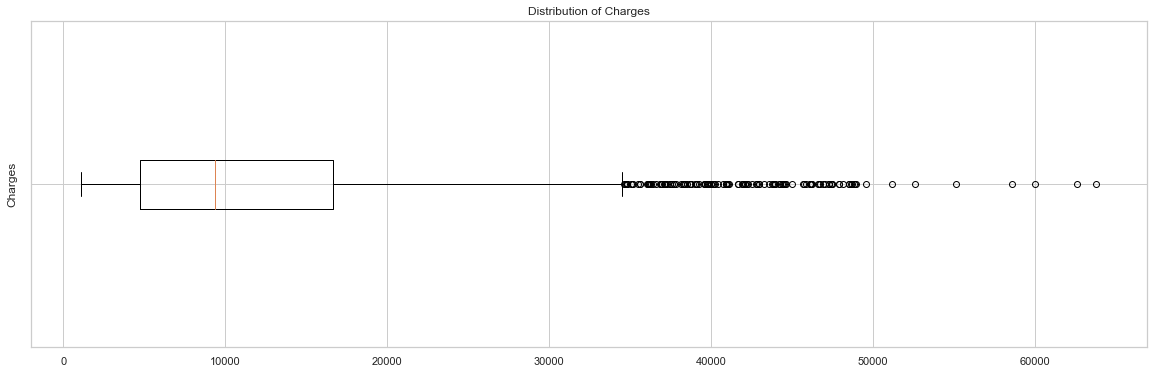

In [22]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(data[ "charges"], labels=[''], showfliers=True, patch_artist=False, zorder=1, vert=False)
axes.set_title("Distribution of Charges")
axes.set_ylabel("Charges")

plt.show()
plt.close()

There are no outliers on the lower end while there are a large amount on the upper end that start around 35,000. There are outliers even 30,000 larger than the first outlier (practically double) which shows how large these maximum values are.

## Insurance - Pairwise Exploration

Through out the beginning of this exploration I was stating that the charges variable is what the rest of the data may be used to explain. However, this may not be the case but also that many other interesting relationships can be gleaned. 

In [23]:
def correlation(data, x, y):
    print("Correlation coefficients:")
    print( "r   =", stats.pearsonr(data[x], data[y])[0])
    print( "rho =", stats.spearmanr(data[x], data[y])[0])

In [24]:
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):

    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)

    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs( 0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="DimGray", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")

    title = "Plot of {0} v. {1}".format(x, y)
    if not skip_lowess:
        title += " with LOWESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)

    plt.show()
    plt.close()

### Sex and Smoker

Sex and smoker are both categorical binary variables. Sex has the two categories of male and female while Smoker has the two categories yes and no. We can look at the amount of people that fall into each category, the joint distributions, and the conditional distributions. I am unsure what I may find but do expect this all to have an even split across the board.

For reference, here are the individual variable counts:

In [25]:
pd.DataFrame(data["sex"].value_counts().sort_index())

,sex
female,662
male,676


In [26]:
pd.DataFrame(data["smoker"].value_counts().sort_index())

,smoker
no,1064
yes,274


In [27]:
print( pd.crosstab( data[ "sex"], data[ "smoker"]))

smoker   no  yes
sex             
female  547  115
male    517  159


From the above it looks as if a higher percentage of males are smokers than femails. To be sure I will run find the joint probability distribution.

In [28]:
result = pd.crosstab( data[ "sex"], data[ "smoker"]).apply(lambda r: r/len(data), axis=1)
print( result)

smoker   no  yes
sex             
female 0.41 0.09
male   0.39 0.12


The conditional distribution will give a clearer picture for given the sex what is the probability they are a smoker. The above shows that the highest percentage of people are female non-smokers and the lowest is female smokers. This does show that less females are smokers than males.

In [29]:
frequencies = pd.crosstab( data["sex"], data["smoker"]).apply(lambda r: r/r.sum(), axis=1)
print(frequencies)

smoker   no  yes
sex             
female 0.83 0.17
male   0.76 0.24


This is spelled out further with the conditional probabilities. Given the person is female, they are a non-smoker 83% of the time, and if they are male, they are a smoker 76% of the time.

### Age and Smoker

Building off of the smoker theme, I am also interested in seeing how age can affect smoking. Do ages have a different rate of smoking? Age is a numerical variable while smoker is a binary categorical variable. 

We can look at the summary statistics for age between the categories of smoker and non-smoker.

In [30]:
grouped = data.groupby( "smoker")
grouped_age = grouped["age"].describe()
print(grouped_age)

         count  mean   std   min   25%   50%   75%   max
smoker                                                  
no     1064.00 39.39 14.08 18.00 26.75 40.00 52.00 64.00
yes     274.00 38.51 13.92 18.00 27.00 38.00 49.00 64.00


First, we see that there are many more non-smokers, but the overall statistics are pretty similar. The min and max are the same which spans the whole data set for both. The percentiles are about the same and so is the mean but the larger values are a bit lower for smokers than non-smokers but by only a few years.

Let's compare the distributions with horizontal box plots.

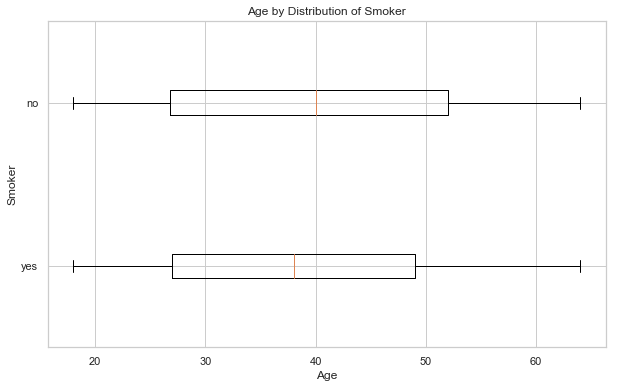

In [31]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

labels = pd.unique(data["smoker"].values)
grouped_data = [grouped[ "age"].get_group( k) for k in labels]
patch = axes.boxplot( grouped_data, labels=labels, patch_artist=False, zorder=1, vert=False)

axes.set_xlabel("Age")
axes.set_ylabel("Smoker")
axes.set_title("Age by Distribution of Smoker")

plt.show()
plt.close()

The box plots give a nice picture showing that the IQR is more compact for smokers so there are a higher percentage that smoke in that age range than don't smoke. It may be interesting to explore age as a categorical variable with buckets of ages of 5 year spans or something similar but that may be digging too far in to force some kind of pattern.

### BMI and Region

Comparing the variables especially with the categorical ones has been especially interesting so I will continue that trend with BMI and region. There may be a specific region that has specific dietary habits resulting in a higher BMI. We can first look at the summary statistics of BMI across region.

In [32]:
grouped = data.groupby( "region")
grouped_bmi = grouped["bmi"].describe()
print(grouped_bmi)

           count  mean  std   min   25%   50%   75%   max
region                                                   
northeast 324.00 29.17 5.94 15.96 24.87 28.88 32.89 48.07
northwest 325.00 29.20 5.14 17.39 25.75 28.88 32.77 42.94
southeast 364.00 33.36 6.48 19.80 28.57 33.33 37.81 53.13
southwest 325.00 30.60 5.69 17.40 26.90 30.30 34.60 47.60


This summary gives a good first snapshot of this data. SE has the highest mean by over 4 with higher values at each level. Also we can see that the north overall is a bit more consistent with each other and the south is a bit higher. We can look at the distributions in more detail with histograms.

In [33]:
labels = pd.unique(data["region"].values)
print(labels)

['southwest' 'southeast' 'northwest' 'northeast']


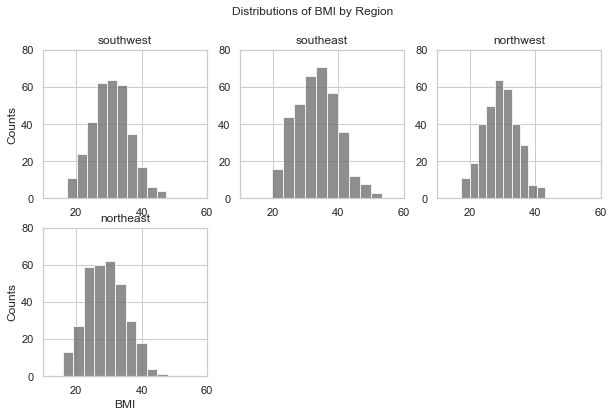

In [34]:
figure = plt.figure(figsize=(10, 6))
figure.suptitle("Distributions of BMI by Region")

for i in enumerate( labels):
    axes = figure.add_subplot(2, 3, i[0] + 1)
    subdata = grouped["bmi"].get_group(i[1]).values
    axes.hist(subdata, alpha=0.75, color="DimGray")
    axes.set_title(labels[i[0]])
    axes.set_ylim((0,80))
    axes.set_xlim((10,60))
    if (i[0] > 2):
        axes.set_xlabel("BMI")
    if (i[0] % 3 == 0):
        axes.set_ylabel("Counts")

plt.show()
plt.close()

These distributions show the story of region's BMI a bit further. This shows there is a large amount of people right around 30 BMI in the SQ and a higher concentration in the SE riight above 30. The NW and NW have very few above 40 while the SE has a large amount above 40. The SW has about the same population above 40 as the NE but their concentration is larger around 30 while the NE has a good amount more ini the mid 20s. 

### BMI and Charges

This is the first set of two numerical variables that has a important story to tell. I feel that the higher BMI would lead to a larger amount of charges as higher BMI can lead to more health issues. 

We can look at the correlation between the two variables as well as their scatterplot.

In [35]:
correlation(data, "bmi", "charges")

Correlation coefficients:
r   = 0.19834096883362887
rho = 0.11939590358331145


The correlation between the two of these variables is surprisingly low. My hunch is that there can be many other expensive health issues that have no relationship to BMI which would drive the charges to be higher. Also, BMI may have a more long term effect, so younger people with higher BMI may not have had any health issues yet. 

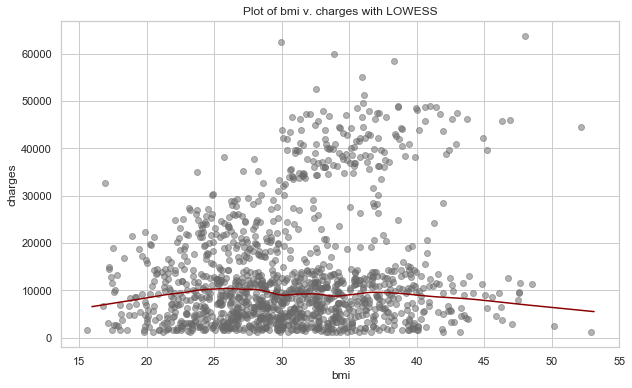

In [36]:
lowess_scatter(data, "bmi", "charges", jitter=0.01, skip_lowess=False)

Again, we see little correlation as there are many with higher BMI that have low charges. We do see some grouping of charges increasing as BMI increases as well but it forms more of a cone shape. The lower BMIs are showing a smaller range of charge values but most charges regardless of BMI lie under the 20000 mark.

### Children and Charges

I could imagine that the more children one person has the higher their insurance charges are as they need to support more people with their insurance. Additionally, pregnancy is expensive so having more children would lead to those pregnancy insurance charges. Children is a numerical variable but as it only has six possible values from this data set we can treat it as a categorical variable. Charges is numerical.

In [37]:
grouped = data.groupby( "children")
grouped_charges = grouped["charges"].describe()
print(grouped_charges)

          count     mean      std     min     25%      50%      75%      max
children                                                                    
0        574.00 12365.98 12023.29 1121.87 2734.42  9856.95 14440.12 63770.43
1        324.00 12731.17 11823.63 1711.03 4791.64  8483.87 15632.05 58571.07
2        240.00 15073.56 12891.37 2304.00 6284.94  9264.98 20379.28 49577.66
3        157.00 15355.32 12330.87 3443.06 6652.53 10600.55 19199.94 60021.40
4         25.00 13850.66  9139.22 4504.66 7512.27 11033.66 17128.43 40182.25
5         18.00  8786.04  3808.44 4687.80 5874.97  8589.57 10019.94 19023.26


The summary statistics above is for charges grouped by the number of children. We can see that the mean goes up a bit from 0 and 1 to 2 and 3, however, it drops off a bit as we increase to 4 and then further up to 5. The number of people with 4 and 5 children is pretty low so those values may not have enough data points to get a more true value. However, the median for 3 and 4 is higher than the others with 4 being the highest median. This could be influenced by the many outliers that people in the 0 and 1 children groups have.

Let's view these distributions with box plots.

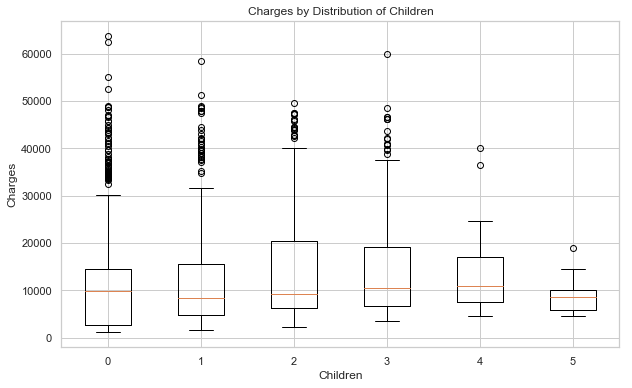

In [38]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

labels = pd.unique(data["children"].values)
labels.sort()
grouped_data = [grouped[ "charges"].get_group( k) for k in labels]
patch = axes.boxplot( grouped_data, labels=labels, patch_artist=False, zorder=1, vert=True)

axes.set_xlabel("Children")
axes.set_ylabel("Charges")
axes.set_title("Charges by Distribution of Children")

plt.show()
plt.close()

With these box plots we can see that there are many more outliers for the 0-3 values. This may be due to the volume of data points for these groups. With that, their means are pulled up much higher. This does show that the IQR for 0 and 1 child are much lower than 2, 3 and 4. 0 and 1 still have many outliers pulling up their means well above their medians.

### Smoker and Charges

With these comparisons against I would like to explore more of the variables against charges. Smoker is a good next step here as I would expect smokers to have higher charges than non-smokers. Smoker is a binary categorical variable while charges is numerical so we can look at the summary statistics split between smokers and non-smokers.

In [39]:
grouped = data.groupby( "smoker")
grouped_charges = grouped["charges"].describe()
print(grouped_charges)

         count     mean      std      min      25%      50%      75%      max
smoker                                                                       
no     1064.00  8434.27  5993.78  1121.87  3986.44  7345.41 11362.89 36910.61
yes     274.00 32050.23 11541.55 12829.46 20826.24 34456.35 41019.21 63770.43


It is pretty clear the differences in the summary statistics. Insurance charges are much higher for smokers across the board with a minimum over 10000 above non-smokers. Let's compare these with horizontal box plots.

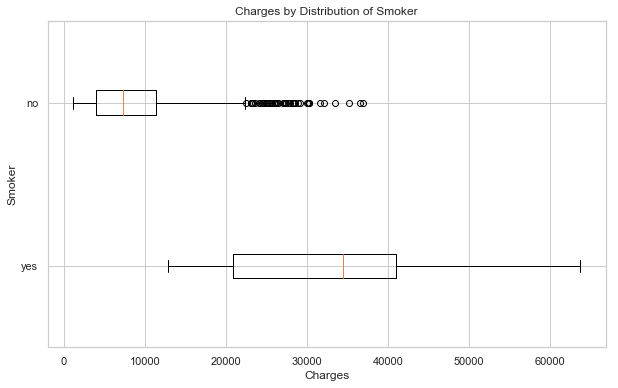

In [40]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

labels = pd.unique(data["smoker"].values)
grouped_data = [grouped[ "charges"].get_group( k) for k in labels]
patch = axes.boxplot( grouped_data, labels=labels, patch_artist=False, zorder=1, vert=False)

axes.set_xlabel("Charges")
axes.set_ylabel("Smoker")
axes.set_title("Charges by Distribution of Smoker")

plt.show()
plt.close()

Interestingly, all of the outliers for the non-smoker distribution lie within the IQR of the smoker distribution. The minimum lies above the 75%. The difference is clear here. If you are a smoker insurance charges are higher. 

### Sex and Charges

I had thought earlier that sex may have an effect on charges based on the healthcare needs for women versus men. This will be comparable to the comparison of smoker and charges because sex is a binary categorical variable. 

In [41]:
grouped = data.groupby( "sex")
grouped_charges = grouped["charges"].describe()
print(grouped_charges)

        count     mean      std     min     25%     50%      75%      max
sex                                                                      
female 662.00 12569.58 11128.70 1607.51 4885.16 9412.96 14454.69 63770.43
male   676.00 13956.75 12971.03 1121.87 4619.13 9369.62 18989.59 62592.87


The summary statistics above show a pretty consistent and similar distribution with the mean for males being a bit higher. Interestingly the IQR for males extends much higher as well.

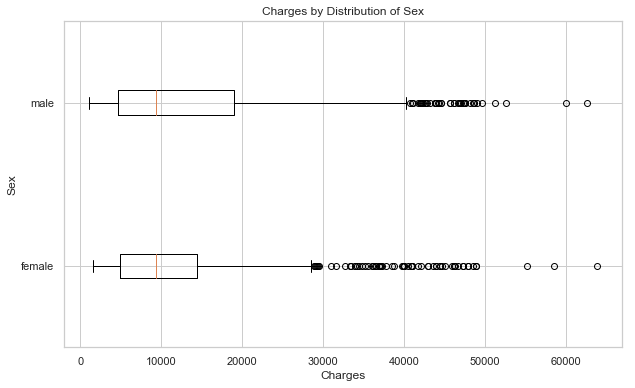

In [42]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

labels = pd.unique(data["sex"].values)
grouped_data = [grouped[ "charges"].get_group( k) for k in labels]
patch = axes.boxplot( grouped_data, labels=labels, patch_artist=False, zorder=1, vert=False)

axes.set_xlabel("Charges")
axes.set_ylabel("Sex")
axes.set_title("Charges by Distribution of Sex")

plt.show()
plt.close()

There is a higher concentration of females right above the median while there is a larger spread for males above the median. With that, the 75th percentile for males is well above that of the female distribution. However, they have a similar amount of outliers in the 50000s and above.

### Age and BMI

Like BMI and region, I am interested to see how age may have an effect on BMI. Do people gain weight as they are older or is there a cultural difference between age groups with BMI? As both of these are numerical we can compare them with their correlation and scatterplots.

In [43]:
correlation(data, "age", "bmi")

Correlation coefficients:
r   = 0.10927188154853515
rho = 0.10773603532023862


The statistics above show barely any correlation between age and bmi. Let's take a look at the scatterplot to see how this correlation looks.

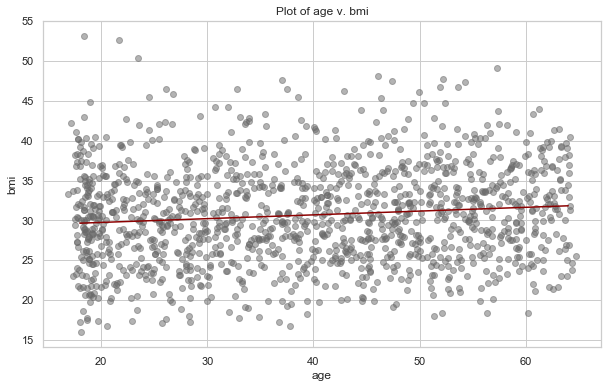

In [44]:
lowess_scatter(data, "age", "bmi", jitter=0.01, skip_lowess=True)

Since the age is specific to the year and doesn't get more specific, I added a bit of jitter to the data. The plot shows a very slight increase however it is pretty flat.

### Children and Region

I have not explored other aspects of how region may be affecting other variables. Region could have an effect on many of these variables due to cultural differences.

As they are both being treated as categorical variables we can look at the counts, joint distributions, and the conditional probabilities.

In [45]:
print( pd.crosstab( data[ "region"], data[ "children"]))

children     0   1   2   3  4  5
region                          
northeast  147  77  51  39  7  3
northwest  132  74  66  46  6  1
southeast  157  95  66  35  5  6
southwest  138  78  57  37  7  8


Looking at the above, they look pretty even across the board, but a few more people have 5 children in the south regions. This will be more clear with the distributions.

In [46]:
result = pd.crosstab( data[ "region"], data[ "children"]).apply(lambda r: r/len(data), axis=1)
print( result)

children     0    1    2    3    4    5
region                                 
northeast 0.11 0.06 0.04 0.03 0.01 0.00
northwest 0.10 0.06 0.05 0.03 0.00 0.00
southeast 0.12 0.07 0.05 0.03 0.00 0.00
southwest 0.10 0.06 0.04 0.03 0.01 0.01


Since certain categories have very small counts, the joint distribution is not as helpful as the conditional probability may be.

In [47]:
frequencies = pd.crosstab( data["region"], data["children"]).apply(lambda r: r/r.sum(), axis=1)
print(frequencies)

children     0    1    2    3    4    5
region                                 
northeast 0.45 0.24 0.16 0.12 0.02 0.01
northwest 0.41 0.23 0.20 0.14 0.02 0.00
southeast 0.43 0.26 0.18 0.10 0.01 0.02
southwest 0.42 0.24 0.18 0.11 0.02 0.02


Given the region we can see the probability of the amount of children. We see that there is not much difference between these distributions. Let's swap them.

In [48]:
frequencies = pd.crosstab( data["children"], data["region"]).apply(lambda r: r/r.sum(), axis=1)
print(frequencies)

region    northeast  northwest  southeast  southwest
children                                            
0              0.26       0.23       0.27       0.24
1              0.24       0.23       0.29       0.24
2              0.21       0.28       0.28       0.24
3              0.25       0.29       0.22       0.24
4              0.28       0.24       0.20       0.28
5              0.17       0.06       0.33       0.44


Given the amount of children, we can have a better idea of the differences. Given 0 through 4 children there is not much difference but given 5 there is a much greater chance for it to be a south region.

### Children and Age
Let's finish off the comparison with children by seeing what the relationship between children and age is. I assume that the older the person the more children one has.

Children is being considered a categorical variable while age is numerical.

In [49]:
grouped = data.groupby( "children")
grouped_age = grouped["age"].describe()
print(grouped_age)

          count  mean   std   min   25%   50%   75%   max
children                                                 
0        574.00 38.44 16.44 18.00 22.00 36.00 55.00 64.00
1        324.00 39.45 12.07 18.00 30.00 40.00 49.00 64.00
2        240.00 39.45 11.59 18.00 30.00 40.00 48.00 64.00
3        157.00 41.57 12.21 18.00 31.00 41.00 52.00 64.00
4         25.00 39.00 12.14 18.00 29.00 39.00 48.00 61.00
5         18.00 35.61 10.12 19.00 28.75 39.00 42.50 52.00


These distributions look pretty equal to me. There is some fluctuation for the max and some small other differences with the 75 percentile and max but for the most part they are all similar. 5 children is a bit different with the max but that is due to a very small data size.

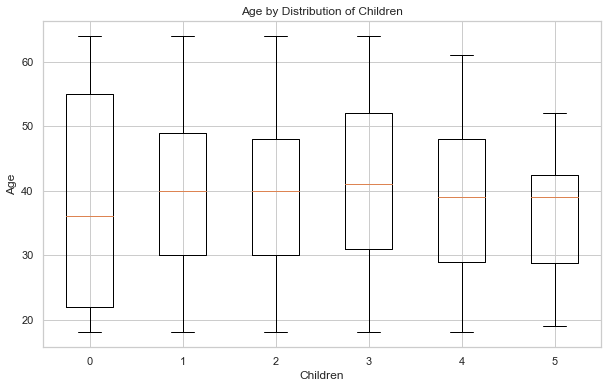

In [50]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

labels = pd.unique(data["children"].values)
labels.sort()
grouped_data = [grouped[ "age"].get_group( k) for k in labels]
patch = axes.boxplot( grouped_data, labels=labels, patch_artist=False, zorder=1, vert=True)

axes.set_xlabel("Children")
axes.set_ylabel("Age")
axes.set_title("Age by Distribution of Children")

plt.show()
plt.close()

We see the consistent distribution here with a smaller median for people with 0 children which makes sense as younger people usually have 0 children and there are many more 18 and 19 year olds than any other age.